In [56]:
import numpy as np
import scipy as sp
from more_itertools import pairwise
import pandas as pd
import scipy.special
import climpy.utils.wrf_chem_utils as wrf_chem
import matplotlib.pyplot as plt
import netCDF4
from climpy.utils.wrf_chem_utils import get_wrf_sd_params
import wrf as wrf  # wrf-python library https://wrf-python.readthedocs.io/en/latest/
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords
from matplotlib.cm import get_cmap
import cartopy.crs as crs

__author__ = 'Sergey Osipov <Serega.Osipov@gmail.com>'

## Diagnostics to debug MADE (WRF-Chem) size distribution parameters (module_optical_averaging):

You'll need a small WRF output to run example

In [57]:
# original output
wrf_fp = '/work/mm0062/b302074/Data/AirQuality/AQABA/chem_100_v5/output/wrfout_d01_2017-07-01_00:00:00'
nc_orig = netCDF4.Dataset(wrf_fp)
# use small subset for faster reading
wrf_fp = '/work/mm0062/b302074/Data/AirQuality/AQABA/chem_100_v5/output/debug/wrfout_d01'
nc = netCDF4.Dataset(wrf_fp)
# nc = xr.open_dataset(wrf_fp)
sgs, dgs, m0s, m3s = get_wrf_sd_params(nc)

In [58]:
# read random var to get coordinates from it
t2 = wrf.getvar(nc_orig, 'T2', timeidx=0)
# Get the latitude and longitude points
lats, lons = latlon_coords(t2)

In [78]:
data_to_plot = 1e6*dgs[1][0,0]

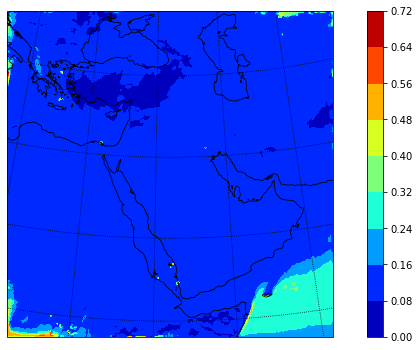

In [79]:
fig = plt.figure(figsize=(12, 6))
# Set the GeoAxes to the projection used by WRF
cart_proj = wrf.get_cartopy(wrfin=nc_orig)
ax = plt.axes(projection=cart_proj)
ax.coastlines('50m', linewidth=0.8)
# Set the map bounds
ax.set_xlim(wrf.cartopy_xlim(wrfin=nc_orig))
ax.set_ylim(wrf.cartopy_ylim(wrfin=nc_orig))
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.contourf(to_np(lons), to_np(lats), data_to_plot, 10,
             transform=crs.PlateCarree(), cmap=get_cmap("jet"))
plt.colorbar()

In [84]:
data_to_plot = dgs[2][0,0] * 1e6  # um
data = 1e6*np.array(dgs)
print('Median dg across mode is {}um '.format(np.median(data[:,0,0], axis=(-1,-2))))

Median dg across mode is [0.02070306 0.09640778 0.48998538]um 


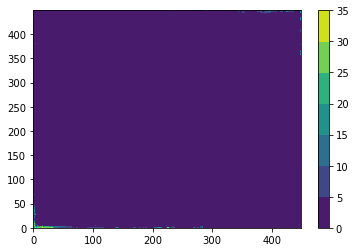

In [61]:
plt.figure()
# plt.contour(data_to_plot)
plt.contourf(data_to_plot)
plt.colorbar()

In [65]:
loni = 217
lati = 299
display(m3s[2][0,0, lati, loni])
display(1e6*dgs[2][0,0, lati, loni])

1.4562427e-09

0.4715356087542685

In [68]:
a = 1e6*dgs[2][0,0]
ind = np.argmax(a)
ind = np.unravel_index(np.argmax(a, axis=None), a.shape)

In [70]:
m3s[2][0,0][ind]

6.664358e-13